In [1]:
#Preprocess data
import pandas as pd
#Preprocess data
df_raw = pd.read_csv('STUDENT.csv', index_col=0)
df = df_raw.drop(['InitialName', 'reason'], axis=1)

df['Mjob'] = df['Mjob'].astype(str)
df['Fjob'] = df['Fjob'].astype(str)
df['guardian'] = df['guardian'].astype(str)
#Map binaries
df['address'] = df['address'].map({ 'U':0, 'R':1 })
df['sex'] = df['sex'].map({ 'M':0, 'F':1 })
df['famsize'] = df['famsize'].map({ 'LE3':0, 'GT3':1 })
df['Pstatus'] = df['Pstatus'].map({ 'A':0, 'T':1 })
df['schoolsup'] = df['schoolsup'].map({ 'no':0, 'yes':1 })
df['famsup'] = df['famsup'].map({ 'no':0, 'yes':1 })
df['paid'] = df['paid'].map({ 'no':0, 'yes':1 })
df['activities'] = df['activities'].map({ 'no':0, 'yes':1 })
df['nursery'] = df['nursery'].map({ 'no':0, 'yes':1 })
df['higher'] = df['higher'].map({ 'no':0, 'yes':1 })
df['internet'] = df['internet'].map({ 'no':0, 'yes':1 })
df['romantic'] = df['romantic'].map({ 'no':0, 'yes':1 })
df['G3'] = df['G3'].map({ 'FAIL': 0, 'PASS': 1 })

#Fill via median for age
df['age'].fillna(df['age'].median(), inplace=True)
df['age'] = df['age'].astype(int)

#Fill via 'none' since hot encode will flag
df['school'].fillna('none', inplace=True)
#df['reason'].fillna('none', inplace=True)

df['G1_nan'] = pd.isnull(df['G1'])
df['G2_nan'] = pd.isnull(df['G1'])
df['G1'].fillna(0, inplace=True)
df['G2'].fillna(0, inplace=True)
#Drop g1 & 2 empty rows
#cols_miss_drop =['G1']
##mask = pd.isnull(df['G1'])
#for col in cols_miss_drop:
# mask = mask | pd.isnull(df[col])
#df = df[~mask]

#df['G1'] = df['G1'].astype(int)
#df['G2'] = df['G2'].astype(int)


#Hot encode
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 46 columns):
sex                1044 non-null int64
age                1044 non-null int32
address            1044 non-null int64
famsize            1044 non-null int64
Pstatus            1044 non-null int64
Medu               1044 non-null int64
Fedu               1044 non-null int64
traveltime         1044 non-null int64
studytime          1044 non-null int64
failures           1044 non-null int64
schoolsup          1044 non-null int64
famsup             1044 non-null int64
paid               1044 non-null int64
activities         1044 non-null int64
nursery            1044 non-null int64
higher             1044 non-null int64
internet           1044 non-null int64
romantic           1044 non-null int64
famrel             1044 non-null int64
freetime           1044 non-null int64
goout              1044 non-null int64
Dalc               1044 non-null int64
Walc               1044 non-null in

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from io import StringIO
import pydot
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

y = df['G3']
x = df.drop(['G3'], axis=1)

#set seed for randomisation
rs = 10

#Convert x into numpy matrix for sklearn consumption
x_mat = x.as_matrix()
#Setup training and test datasets on a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x_mat, y, test_size=0.3, stratify=y, random_state=rs)

#simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(x_train, y_train)

#Check accuracy on the training sets
print("Train accuracy:", model.score(x_train, y_train))
#Check accuracy on the test sets
print("Test accuracy:", model.score(x_test, y_test))

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

#Check which features have the largest impact on the decision tree?
import numpy as np

#grab feature importances from the model and feature name from the original x
importances = model.feature_importances_
feature_names = x.columns

#sort in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

#limit to 20 features

for i in indices:
    print(feature_names[i], ':', importances[i])

#simple decision tree training
model = DecisionTreeClassifier(max_depth=3, random_state=rs)
model.fit(x_train, y_train)

#Check accuracy on the training sets
print("LIMITED--------------------")
print("Train accuracy:", model.score(x_train, y_train))
#Check accuracy on the test sets
print("Test accuracy:", model.score(x_test, y_test))

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

#Check which features have the largest impact on the decision tree?
import numpy as np

#grab feature importances from the model and feature name from the original x
importances = model.feature_importances_
feature_names = x.columns

#sort in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

#limit to 20 features

for i in indices:
    print(feature_names[i], ':', importances[i])

Train accuracy: 1.0
Test accuracy: 0.8598726114649682
             precision    recall  f1-score   support

          0       0.80      0.82      0.81       115
          1       0.89      0.88      0.89       199

avg / total       0.86      0.86      0.86       314

G2 : 0.6684024713874138
G1 : 0.11671200587837371
age : 0.030803140895536076
traveltime : 0.01730392170093314
schoolsup : 0.01617933727120349
address : 0.015048443619872193
health : 0.01312155501372607
failures : 0.012997989397803425
studytime : 0.012937338456481873
guardian_father : 0.010355523415224907
goout : 0.009380695747194679
Medu : 0.008254183627317956
freetime : 0.00786112726411234
Mjob_services : 0.007197034782322627
romantic : 0.007075014537701106
Fjob_other : 0.006738744274803477
Fjob_at_home : 0.005158864767073723
absences : 0.005067619539900989
Pstatus : 0.0046648447501326015
famrel : 0.004421884086063191
Dalc : 0.00393056363205617
activities : 0.0029479227240421274
sex : 0.0029479227240421274
Fjob_health : 0

C:\Users\rickm\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


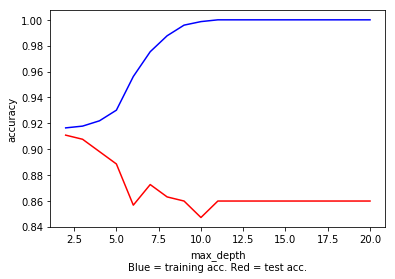

In [8]:
#Observe graph
test_score = []
train_score = []
# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
 model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
 model.fit(x_train, y_train)

 test_score.append(model.score(x_test, y_test))
 train_score.append(model.score(x_train, y_train))

import matplotlib.pyplot as plt
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

In [4]:
# Criterion: gini, entropy
# Max depth: use 2 - 5
# Min leaf samples: 20-50 : 10
from sklearn.model_selection import GridSearchCV
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 10),
 'min_samples_leaf': range(10, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),cv=10)
cv.fit(x_train, y_train)

print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))
# test the best model
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9164383561643835
Test accuracy: 0.910828025477707
             precision    recall  f1-score   support

          0       0.87      0.90      0.88       115
          1       0.94      0.92      0.93       199

avg / total       0.91      0.91      0.91       314

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}


In [5]:
#Find optimal values
# Criterion: gini, entropy
# Max depth: use 1 - 5
# Min leaf samples: 20-50 : 10
from sklearn.model_selection import GridSearchCV
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 4),
 'min_samples_leaf': range(2, 35, 2)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),cv=10)
cv.fit(x_train, y_train)

print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))
# test the best model
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9164383561643835
Test accuracy: 0.910828025477707
             precision    recall  f1-score   support

          0       0.87      0.90      0.88       115
          1       0.94      0.92      0.93       199

avg / total       0.91      0.91      0.91       314

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}


In [12]:
#Find optimal values
# Criterion: gini, entropy
# Max depth: use 1 - 5
# Min leaf samples: 20-50 : 10
from sklearn.model_selection import GridSearchCV
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(3,4),
 'min_samples_leaf': range(2, 25)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),cv=10)
cv.fit(x_train, y_train)

print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))
# test the best model
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9164383561643835
Test accuracy: 0.910828025477707
             precision    recall  f1-score   support

          0       0.87      0.90      0.88       115
          1       0.94      0.92      0.93       199

avg / total       0.91      0.91      0.91       314

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 9}


In [13]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from tools import visualize_decision_tree, analyse_feature_importance
analyse_feature_importance(cv.best_estimator_, x.columns, 20)
visualize_decision_tree(cv.best_estimator_, x.columns, "gridSearch_optimal_tree.png")

G2 : 0.884704703758936
G1 : 0.11529529624106412
guardian_other : 0.0
famsup : 0.0
famrel : 0.0
romantic : 0.0
internet : 0.0
higher : 0.0
nursery : 0.0
activities : 0.0
paid : 0.0
schoolsup : 0.0
goout : 0.0
failures : 0.0
studytime : 0.0
traveltime : 0.0
Fedu : 0.0
Medu : 0.0
Pstatus : 0.0
famsize : 0.0
